<center>##Airbnb booking data cleaning</center>

In [1]:
import os
import pathlib
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
%matplotlib inline

## Preliminary investigation of the data

###<center> Data loading and preliminary investigation</center>

In [3]:
users_df = pd.read_csv('../input/train_users_2.csv')

In [4]:
sessions_df = pd.read_csv('../input/sessions.csv')

In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [6]:
users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [7]:
users_df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [8]:
sorted_age = users_df['age'].sort_values()

In [9]:
sorted_age.head()

83117     1.0
194600    1.0
84865     2.0
5749      2.0
191312    2.0
Name: age, dtype: float64

In [10]:
sorted_age.tail()

213442   NaN
213444   NaN
213447   NaN
213449   NaN
213450   NaN
Name: age, dtype: float64

We can see that is significant number of NaNs in 'date_first_booking' and 'age' columns. And min age is 1 and max age is 2014
that is terrible.

In [11]:
count_age_values = users_df['age'].groupby(by=users_df['age']).count().sort_index()

In [12]:
count_age_values.shape

(127,)

In [13]:
count_age_values.min()

1

In [14]:
count_age_values.idxmax()

30.0

In [15]:
count_age_values[30]

6124

In [16]:
count_age_values.head()

age
1.0      2
2.0      7
4.0      3
5.0     45
15.0     8
Name: age, dtype: int64

In [17]:
count_age_values.tail()

age
1953.0      1
1995.0      1
2008.0      1
2013.0     39
2014.0    710
Name: age, dtype: int64

For clarity, let's make some graphs.

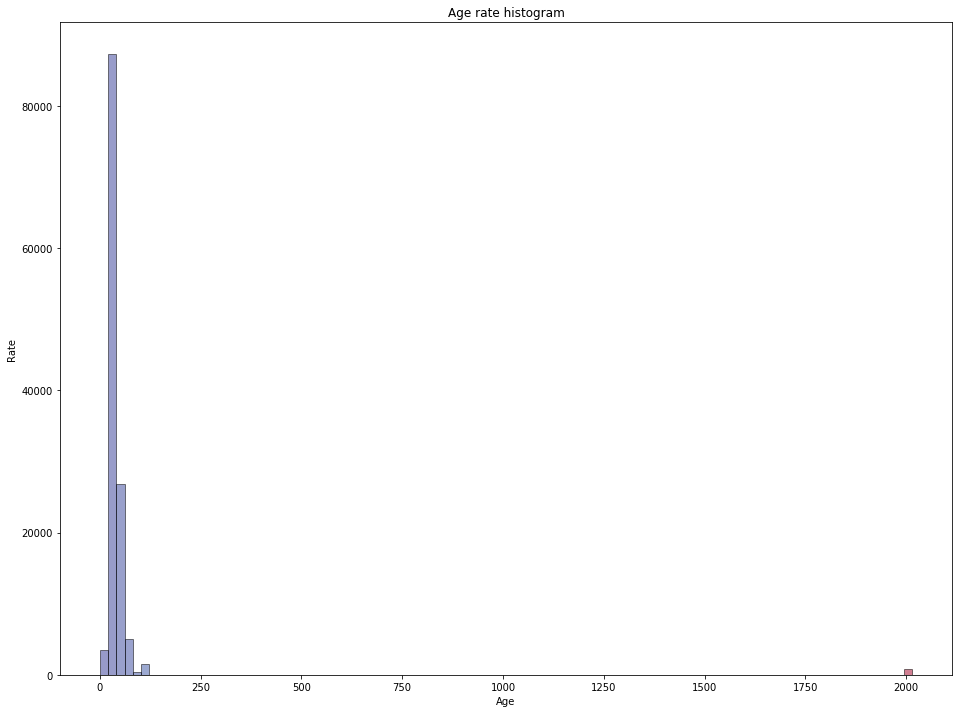

In [18]:
cm = plt.cm.get_cmap('RdYlBu_r')
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
#n, bins, patches = ax.hist(count_age_values, 20, color='green', alpha=0.5, histtype='bar', ec='black')
n, bins, patches = ax.hist(users_df['age'].sort_values().dropna(), 100, color='green', alpha=0.5, histtype='bar', ec='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, path in zip(col, patches):
    plt.setp(path, 'facecolor', cm(c))
ax.set_xlabel("Age")
ax.set_ylabel("Rate")
ax.set_title("Age rate histogram")
plt.show()

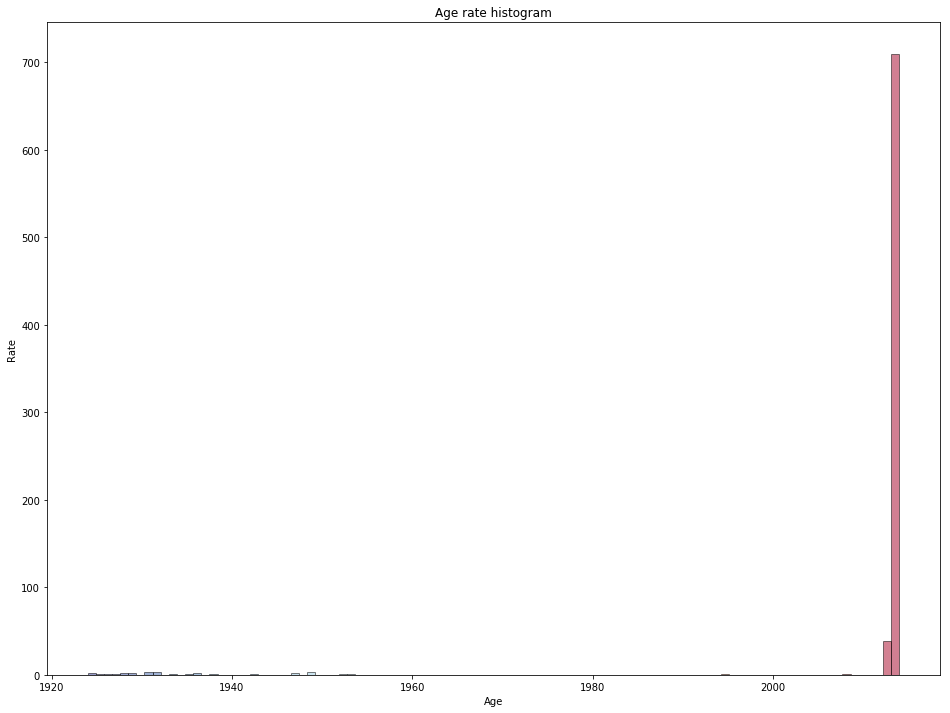

In [19]:
cm = plt.cm.get_cmap('RdYlBu_r')
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
#n, bins, patches = ax.hist(count_age_values, 20, color='green', alpha=0.5, histtype='bar', ec='black')
n, bins, patches = ax.hist(users_df.loc[users_df['age'] > 500, 'age'].sort_values().dropna(), 100, color='green', alpha=0.5, histtype='bar', ec='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, path in zip(col, patches):
    plt.setp(path, 'facecolor', cm(c))
ax.set_xlabel("Age")
ax.set_ylabel("Rate")
ax.set_title("Age rate histogram")
plt.show()

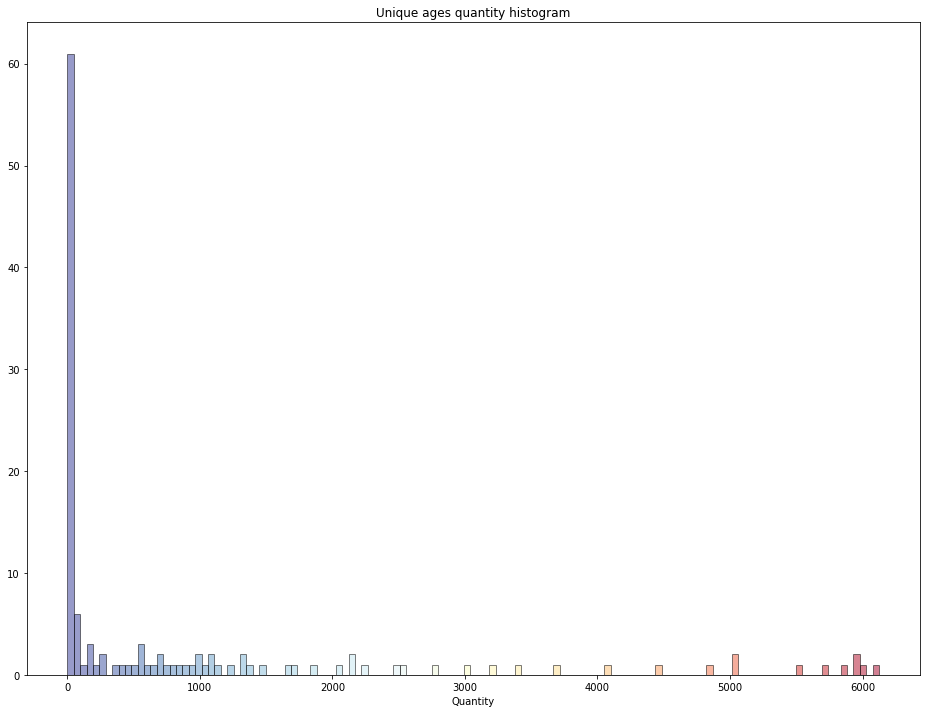

In [20]:
cm = plt.cm.get_cmap('RdYlBu_r')
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
#n, bins, patches = ax.hist(count_age_values, 20, color='green', alpha=0.5, histtype='bar', ec='black')
n, bins, patches = ax.hist(count_age_values.values, 127, color='green', alpha=0.5, histtype='bar', ec='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, path in zip(col, patches):
    plt.setp(path, 'facecolor', cm(c))
ax.set_xlabel("Quantity")
#ax.set_ylabel("Quantity")
ax.set_title("Unique ages quantity histogram")
#ax.set_ylim(count_age_values.min(), count_age_values.max())
#ax.set_ylim(1, 70)
plt.show()

In [21]:
cm = plt.cm.get_cmap('RdYlBu_r')

#n, bins, patches = ax.hist(count_age_values, 20, color='green', alpha=0.5, histtype='bar', ec='black')
n, bins, patches = ax.hist(count_age_values.index, 127, color='green', alpha=0.5, histtype='bar', ec='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, path in zip(col, patches):
    plt.setp(path, 'facecolor', cm(c))
ax.set_xlabel("Age")
ax.set_ylabel("Quantity")
ax.set_title("Unique ages quantity histogram")
plt.show()

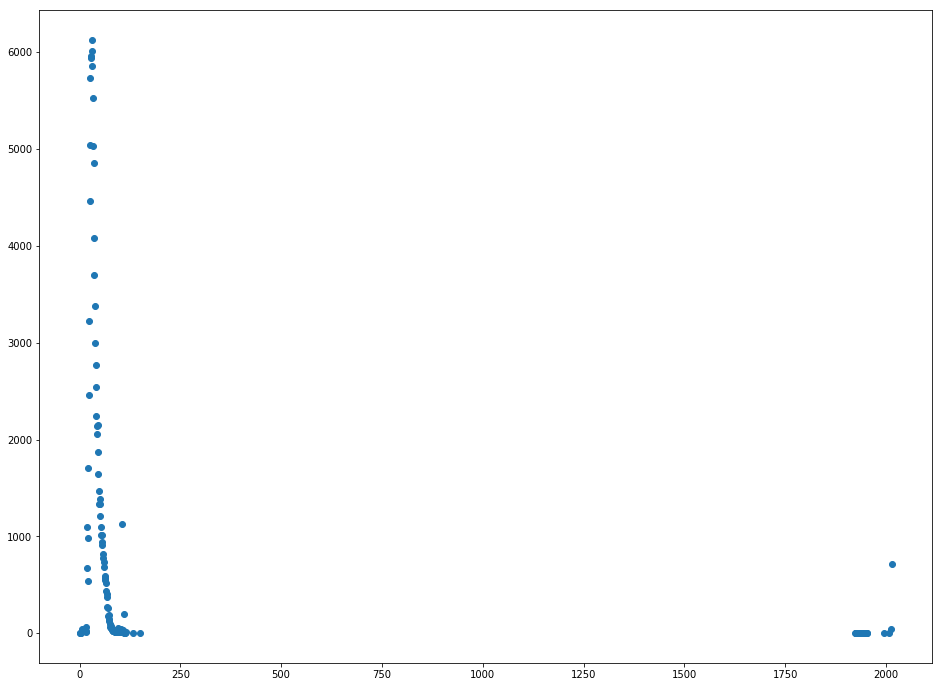

In [22]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.scatter(count_age_values.index, count_age_values.values)

fig_box = plt.figure(figsize=(16, 12))
ax_box = fig_box.add_subplot(111)
#ax_box.boxplot(users_df['age'].values, 1)
ax_box.boxplot(users_df)
plt.show()

Find a most common age value (mode)

In [23]:
age_mode = count_age_values.idxmax()

In [24]:
age_mode

30.0

Suppose that all values of age less than 16 and greater than 90 are outliers and erroneus
(for example, the user made a mistake when entering and entered the current year, or only entered current month date that less then 16)
Assign to such dates NaN:

In [25]:
users_df.loc[users_df['age'] > 90, 'age'] = np.nan
users_df.loc[users_df['age'] < 16, 'age'] = np.nan

And fill them by age mode

In [26]:
users_df.loc[users_df['age'].isnull(), 'age'] = age_mode

In [27]:
any(users_df['age'].isnull())

False

Now we need to decide what to do with 'date_first_booking' column. Calculate what percentage of non NaN values:

In [28]:
print("{}%".format(users_df[users_df['date_first_booking'].notna()].shape[0] / users_df.shape[0] * 100))

41.65265095970504%


Since it contains only  42% not NaN values it seems appropriate to drop this column.
Simple strategies - fill in the values with the most common value from the non NaN part,
or the average is unlikely to fit here, and more complex ones are unlikely to work. But, anyway, we can try
to fill NaN values with values from the non-NaN part with the same frequency distribution as in the non-NaN part.
And further, when using for training the model, it will be possible to check both options - with the column droped and with the filled.

Apparently in the future we will use this approach of filling NaNs. Therefore, it makes sense to write a function for this.

In [ ]:
#select rows where 'date_first_booking' column contain NaN
date_fb_na_len = len(users_df.loc[users_df['date_first_booking'].isna(), 'date_first_booking'])
#Select rows where 'date_first_booking' column not contain NaN
##date_first_booking_notna = users_df.loc[users_df['date_first_booking'].notna(), 'date_first_booking']
#group by date first booking
##gropuped_date_first_booking_notnan = date_first_booking_notna.groupby(by=users_df['date_first_booking'])
#compute quantity of each date value 
##count_gropuped_date_first_booking_notnan = gropuped_date_first_booking_notnan.count()
count_date_fb_notna = users_df.loc[
    users_df['date_first_booking'].notna(), 'date_first_booking'].values_count()
#compute relative frequencies (probabilities) of each value
#frequencies = count_gropuped_date_first_booking_notnan / count_gropuped_date_first_booking_notnan.sum()
frequencies = count_date_fb_notna / count_date_fb_notna.sum()
#make array that contain fill values with the same relative frequencies as in 'not NaN' column part
#create array with the same distribution of values as in the non-zero part
date_first_booking_fill_values = np.array(
    [np.random.choice(frequencies.index, p=frequencies.values) for _ in range(date_first_booking_na_len)]
)
#fill values
users_df.loc[users_df['date_first_booking'].isna(), 'date_first_booking'] = date_first_booking_fill_values

In [37]:
def fill_nans(df, column):
    #calculate number of NaNs in column
    na_len = len(df.loc[df[column].isna(), column])
    #create a pandas series containing values and corresponding quantities from not NaNs part of the column
    count_notna = df.loc[df[column].notna(), column].value_counts()
    #calculate relative frequencies (probabilities) of each value
    frequencies = count_notna / count_notna.sum()
    #make array that contain fill values with the same relative frequencies as in 'not NaN' column part
    fill_values = np.array(
        [np.random.choice(frequencies.index, p=frequencies.values) for _ in range(na_len)]
    )
    #fill NaNs
    df.loc[df[column].isna(), column] = fill_values
    return df

In [38]:
users_df = fill_nans(users_df, 'date_first_booking')

In [39]:
any(users_df['date_first_booking'].isna())

False

Now consider 'first_affiliate_tracked' column

In [40]:
first_at_not_na_uniques_count = users_df.loc[
    users_df['first_affiliate_tracked'].notna(), 'first_affiliate_tracked'].groupby(
    by=users_df['first_affiliate_tracked']).count()

In [41]:
first_at_not_na_uniques_count.shape

(7,)

In [42]:
first_at_not_na_uniques_count

first_affiliate_tracked
linked            46287
local ops            34
marketing           139
omg               43982
product            1556
tracked-other      6156
untracked        109232
Name: first_affiliate_tracked, dtype: int64

In [43]:
users_df[users_df['first_affiliate_tracked'].isna()].shape[0] / users_df.shape[0] * 100

2.84140153946339

We can see that 'first_affiliate_tracked' column contains 2.84% NaNs. And fill NaNs by mode value - 'untracked' it's not exactly what we need. Other values make up a large proportion of all values. Therefore, we do the same as with 'date_first_booking' column

In [44]:
users_df = fill_nans(users_df, 'first_affiliate_tracked')

In [45]:
any(users_df['first_affiliate_tracked'].isna())

False

Now consider the sessions dataset

In [46]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [47]:
sessions_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [48]:
sessions_df.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [49]:
sessions_df.isna().sum() / len(sessions_df) * 100

user_id           0.326428
action            0.753482
action_type      10.657003
action_detail    10.657003
device_type       0.000000
secs_elapsed      1.287229
dtype: float64

We can see that all columns, except 'device type', in sessions datasets have NaN values. 'action_type' and 'action_detail'
have about 11% NaNs. It seems appropriate to fill such values. And NaN in other columns should also be filled,
except 'user_id' column (NaNs in this column look at least strange.).
In this case, it is most advisable to delete rows containing NaN values in 'user_id' column, the more so because they
are few .
But first, let's take a closer look at this column.

In [50]:
users_df_unique_user_ids = set(users_df['id'].unique())
sessions_df_unique_user_ids = set(sessions_df['user_id'].unique())

In [51]:
print(len(users_df_unique_user_ids))
print(len(sessions_df_unique_user_ids))

213451
135484


We can see that the number of unique usrers identifiers is quite different.
Calculate numbers of match ids, and and not match ids.

In [53]:
print("len of intersection:", len(users_df_unique_user_ids.intersection(sessions_df_unique_user_ids)))
print(
    "len of difference unique user ids in users_df and sessions_df:",
    len(users_df_unique_user_ids.difference(sessions_df_unique_user_ids)))
print("len of difference unique user ids in sessions_df and users_df:",
      len(sessions_df_unique_user_ids.difference(users_df_unique_user_ids)))

len of intersection: 73815
len of difference unique user ids in users_df and sessions_df: 139636
len of difference unique user ids in sessions_df and users_df: 61669


The most interesting is that in sessions dataset there are identifiers of which are not in users dataset. And number
of intersected users ids not very large. But, all the same, it makes sense to use user dataset in combination
with sessions dataset.

Preliminary results:
1. We can see that some columns in sessions data and users data have signficant numbers of NaN values.
sessions:
- user_id           0.326428% (which is curious in itself)
- action            0.753482%
action_type      10.657003%
action_detail    10.657003%
device_type       0.000000%
secs_elapsed      1.287229%

- 2. user_id column in sessions data contain 0.326428% NaNs, rows with will be deleted when we  will simultaneously use data from sessions and users datasets (or may be we find the way fill this values).
- 3. Deciding what to do with the NaNs in columns action_type and action_detail (Delete or fill by average, mode or by values that we can retrieve using simple ML models) requires additional exploring.
- 4. NaNs in secs_elapsed in session data we can fill by mean or mode.
- 5. NaNs in first_affiliate_tracked in users data make sense delete or fill by mode.
- 6. NaNs in date_first_booking requires additional exploring. Or delete whole column if additional exploring don't give result.
- 7. Same for age column.
- 8. It is also worth paying attention to the fact that the set of user IDs in sessions dataset and users dataset  do not match, but only intersect in some part of thes. There are users whose IDs are in session dataset  but not in users dataset, which strange.
- 9. It is also worthwhile to look in more detail at the distribution of the number of unique values in each column of each dataset.
- 10. Add columns with timestamps converted in datetime format.

Consider columns 'action', 'action_type', 'action_detail' in more detail.

In [58]:
sessions_df['action'].value_counts()

show                           2768278
index                           843699
search_results                  725226
personalize                     706824
search                          536057
ajax_refresh_subtotal           487744
update                          365130
similar_listings                364624
social_connections              339000
reviews                         320591
active                          188036
similar_listings_v2             168788
lookup                          162041
create                          155887
dashboard                       152952
header_userpic                  141830
collections                     124417
edit                            109083
campaigns                       105028
track_page_view                  81117
unavailabilities                 78317
qt2                              64651
notifications                    59392
confirm_email                    58726
requested                        57034
identity                 

Select rows with NaN in 'action' column

In [60]:
action_nan = sessions_df[sessions_df['action'].isna()]

Calculate the number of unique values in 'action_type', 'action_detail', 'device_type' columns in those rows where there are NaNs in 'action' column

In [61]:
print(len(action_nan['action_type'].unique()))
print(len(action_nan['action_detail'].unique()))
print(len(action_nan['device_type'].unique()))

1
1
13


In [62]:
print(action_nan['action_type'].unique())
print(action_nan['action_detail'].unique())
print(action_nan['device_type'].unique())

['message_post']
['message_post']
['Windows Desktop' 'iPad Tablet' 'Mac Desktop' 'iPhone' 'Linux Desktop'
 'Android App Unknown Phone/Tablet' 'Android Phone' 'Tablet' '-unknown-'
 'Chromebook' 'Windows Phone' 'iPodtouch' 'Blackberry']


We can see that 'action_type' and 'action_detail' contains the same value: 'message_post' if 'action'
contain NaN in that row

In [63]:
action_not_na = sessions_df[sessions_df['action'].notna()]

In [64]:
action_not_na_uniques = action_not_na['action'].unique()
action_type_not_na_uniques = action_not_na['action_type'].unique()
action_detail_not_na_uniques = action_not_na['action_detail'].unique()

In [66]:
print('message_post' in action_type_not_na_uniques)
print('message_post' in action_detail_not_na_uniques)

True
True


We can see that  'action_type' and 'action_detail' contain 'message_post' also in rows where 'action' column not contain NaNs

Let's see what values are contained in columns 'action_type' and 'action_detail' in rows where there are no NaNs in 'action' column

In [68]:
print(action_not_na.loc[action_not_na['action_type'] == 'message_post', 'action'].unique())
print(action_not_na.loc[action_not_na['action_detail'] == 'message_post', 'action'].unique())

['15' '12' '10' '11' 'multi_message' 'guest_booked_elsewhere'
 'preapproval' 'maybe_information' 'special_offer']
['15' '12' '10' '11' 'multi_message' 'guest_booked_elsewhere'
 'preapproval' 'maybe_information' 'special_offer']


We can see that values the same

Check whether the indices in  'action_type' and 'action_detail' columns match in the part of these columns where there are zero values.

print(
    set(action_not_na[action_not_na['action_type'] == 'message_post'].index) == 
    set(action_not_na[action_not_na['action_detail'] == 'message_post'].index)
)

We can see that indexes of rows, where 'action_type' and 'action_detail' columns contains 'message_post' value, match up.
Hence we can fill NaNs in 'action' column with values from 'not NaN' part of 'action' column

grouped_action_not_na = action_not_na.loc[action_not_na['action_type'] == 'message_post', 'action'].groupby(
    by=action_not_na['action_type'])
count_action_not_na = grouped_action_not_na.count()
frequencies = count_action_not_na / count_action_not_na.sum()
action_na_fill_values = np.array(
    [np.random.choice(frequencies.index, p=frequencies.values) for _ in range(len(action_nan))])

frequencies = count_gropuped_date_first_booking_notnan / count_gropuped_date_first_booking_notnan.sum()

action_fill_values = np.array(
    [np.random.choice(frequencies.index, p=frequencies.values) for _ in range(len(action_nan))])
sessions_df.loc[sessions_df['action'].isna(), 'action'] = action_fill_values

any(sessions_df['action'].isna())

Now consider columns 'action_type' and 'action_detail' itself. They have the same number of NaNs, and we can assume that the indices of the rows in which these values are located match up.

In [ ]:
all(sessions_df[sessions_df['action_type'].isna()].index == sessions_df[sessions_df['action_detail'].isna()].index)

The rows are the same as we expected. Now we select rows that contain NaN in 'action_type' and 'action_detail'
and rows that not contain. And we can use for selecting NaN and not NaN rows only one of them, 'action_type' for example

In [ ]:
act_td_nans_df = sessions_df[sessions_df['action_type'].isna()]
act_td_not_nans_df = sessions_df[sessions_df['action_type'].notna()]

In [ ]:
act_td_nans_df.shape

In [ ]:
act_td_nans_df.head()

In [ ]:
act_td_not_nans_df.shape

In [ ]:
act_td_not_nans_df.head()

In [ ]:
action_t_td_not_nans_uniques_count = act_td_not_nans_df['action_type'].groupby(
    by=act_td_not_nans_df['action_type']).count()

In [ ]:
print(len(action_t_td_not_nans_uniques_count))

In [ ]:
action_d_td_not_nans_uniques_count = act_td_not_nans_df['action_detail'].groupby(
    by=act_td_not_nans_df['action_detail']).count()

In [ ]:
print(len(action_d_td_not_nans_uniques_count))

In [ ]:
print(action_t_td_not_nans_uniques_count.index)

In [ ]:
print(action_d_td_not_nans_uniques_count.index)

We can fill NaN values in 'action_type' and 'action_detail' columns with values from 'not NaN' parts of these columns
with corresponding frequencies (as we did before for 'age' column in users dataset, and 'action' column in sessions
dataset).

In [ ]:
#action_t_td_not_nans_uniques_count
action_t_td_nan_len = len(sessions_df[sessions_df['action_type'].isna()])
frequencies = action_t_td_not_nans_uniques_count / action_t_td_not_nans_uniques_count.sum()
action_t_td_na_fill_values = np.array(
    [np.random.choice(frequencies.index, p=frequencies.values) for _ in range(action_t_td_nan_len)])

sessions_df.loc[sessions_df['action_type'].isna(), 'action_type'] = action_t_td_na_fill_values

In [ ]:
any(sessions_df['action_type'].isna())

In [ ]:
action_d_td_nan_len = len(sessions_df[sessions_df['action_detail'].isna()])
frequencies = action_d_td_not_nans_uniques_count / action_d_td_not_nans_uniques_count.sum()
action_d_td_na_fill_values = np.array(
    [np.random.choice(frequencies.index, p=frequencies.values) for _ in range(action_d_td_nan_len)])

sessions_df.loc[sessions_df['action_detail'].isna(), 'action_detail'] = action_d_td_na_fill_values

In [ ]:
any(sessions_df['action_detail'].isna())

In [ ]:
all_users['date_first_active'] = pd.to_datetime(all_users.timestamp_first_active // 1000000, format = '%Y%m%d')

In [ ]:
df_train['date_first_active'] = pd.to_datetime((df_train.timestamp_first_active // 1000000), format='%Y%m%d')
df_train['date_first_booking'] = pd.to_datetime(df_train['date_first_booking'])